In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def get_classificaton(ratio):
	ratio =round(ratio,1)
	toret=""
	if(ratio>=3):
		toret="Slender"
	elif(ratio>=2.1 and ratio<3):
		toret="Medium"
	elif(ratio>=1.1 and ratio<2.1):
		toret="Bold"
	elif(ratio<=1):
		toret="Round"
	toret="("+toret+")"
	return toret

In [4]:
#rnjn
print ("Starting")
img = cv2.imread('2-Figure1-1.png',0)#load in greyscale mode

#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image


kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

#edge detection
edges = cv2.Canny(dilation,100,200)

### Size detection
contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("No. of rice grains=",len(contours))

Starting
No. of rice grains= 29


In [5]:
total_ar=0
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	aspect_ratio = float(w)/h
	if(aspect_ratio<1):
		aspect_ratio=1/aspect_ratio
	print (round(aspect_ratio,2),get_classificaton(aspect_ratio))
	total_ar+=aspect_ratio
avg_ar=total_ar/len(contours)
print ("Average Aspect Ratio=",round(avg_ar,2),get_classificaton(avg_ar))

2.6 (Medium)
1.86 (Bold)
2.6 (Medium)
1.0 (Round)
1.11 (Bold)
2.17 (Medium)
3.25 (Slender)
1.57 (Bold)
2.17 (Medium)
2.75 (Medium)
2.5 (Medium)
2.33 (Medium)
2.5 (Medium)
2.5 (Medium)
1.75 (Bold)
2.6 (Medium)
1.09 (Bold)
3.25 (Slender)
1.38 (Bold)
1.67 (Bold)
2.33 (Medium)
2.8 (Medium)
2.8 (Medium)
1.62 (Bold)
1.86 (Bold)
2.33 (Medium)
2.17 (Medium)
3.75 (Slender)
13.89 (Slender)
Average Aspect Ratio= 2.63 (Medium)


Text(0.5, 1.0, 'Original image')

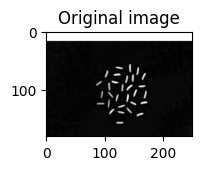

In [6]:
#plot the images
imgs_row=2
imgs_col=3
plt.subplot(imgs_row,imgs_col,1),plt.imshow(img,'gray')
plt.title("Original image")     

Text(0.5, 1.0, 'Binary image')

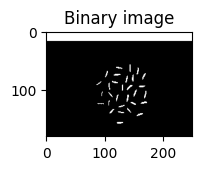

In [7]:
plt.subplot(imgs_row,imgs_col,2),plt.imshow(binary,'gray')
plt.title("Binary image")

Text(0.5, 1.0, 'Filtered image')

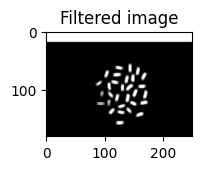

In [8]:

plt.subplot(imgs_row,imgs_col,3),plt.imshow(dst,'gray')
plt.title("Filtered image")

Text(0.5, 1.0, 'Eroded image')

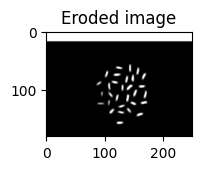

In [9]:
plt.subplot(imgs_row,imgs_col,4),plt.imshow(erosion,'gray')
plt.title("Eroded image")


Text(0.5, 1.0, 'Dialated image')

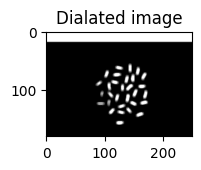

In [10]:
plt.subplot(imgs_row,imgs_col,5),plt.imshow(dilation,'gray')
plt.title("Dialated image")

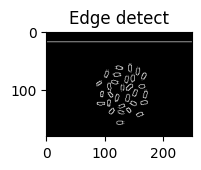

In [11]:
plt.subplot(imgs_row,imgs_col,6),plt.imshow(edges,'gray')
plt.title("Edge detect")

plt.show()

In [11]:
# write code for image preprocessing in python  
